## Import Statements

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
adv = pd.read_csv('Advertising.csv')

In [76]:
adv.head()
adv = adv.drop('Unnamed: 0', axis = 1)

In [77]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [78]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<Axes: >

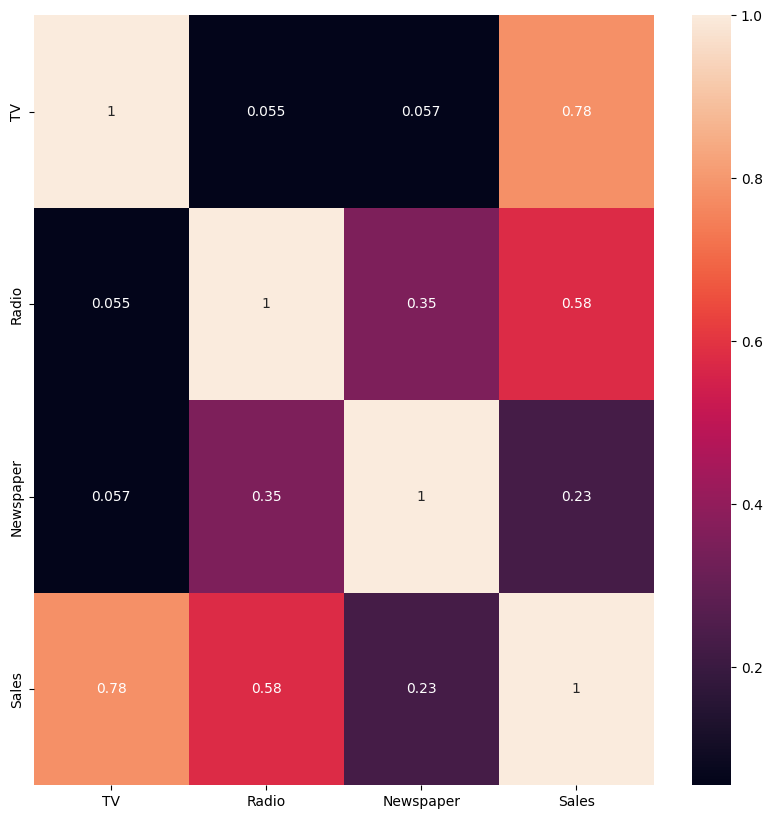

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(adv.corr(), annot = True)

## Observations:
- From most to least correlated with positive sales:
    -T.V
    -Radio
    -Newspaper

## Linear regression=

In [80]:
T_V = adv.TV.values.reshape(len(adv.TV), 1) 
sales = adv.Sales.values.reshape(len(adv.Sales), 1) 

In [81]:
from sklearn import linear_model

In [82]:
TV_model = linear_model.LinearRegression()
TV_model.fit(T_V, sales)


LinearRegression()

In [83]:
TV_model.coef_

array([[0.04753664]])

In [84]:
coeffs_tv = np.array(list(TV_model.intercept_.flatten()) + list(TV_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)
coeffs_tv

[7.032593549127695, 0.04753664043301975]

## We are going to do this for all the variables:

In [85]:
radio = adv.Radio.values.reshape(len(adv.Radio), 1)
newspaper = adv.Newspaper.values.reshape(len(adv.Newspaper), 1)

radio_model = linear_model.LinearRegression()
radio_model.fit(radio, sales)

newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(newspaper, sales)

LinearRegression()

In [86]:
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))

In [87]:
coeffs_radio

array([9.3116381 , 0.20249578])

In [88]:
sales_intercepts = {}
sales_intercepts['T.V'] = coeffs_tv
sales_intercepts['Radio'] = coeffs_radio
sales_intercepts['Newspaper'] = coeffs_newspaper
sales_lin_model = pd.DataFrame(sales_intercepts)
sales_lin_model.index = ['Intercept', 'Coefficient']
sales_lin_model

,T.V,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [109]:
predictions = [TV_model.predict(T_V), radio_model.predict(radio), newspaper_model.predict(newspaper)]

## Calculating R-squared

In [89]:
tv_rsq = TV_model.score(T_V, sales)
radio_rsq = radio_model.score(radio, sales)
newspaper_rsq = newspaper_model.score(newspaper, sales)

tv_rsq

0.611875050850071

In [90]:
rsq = {'T.V':tv_rsq, 'Radio': radio_rsq, 'Newspaper': newspaper_rsq}
sales_lin_model

,T.V,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [91]:
sales_lin_model.loc['R-Squared'] = rsq

In [106]:
data = [T_V, radio, newspaper]

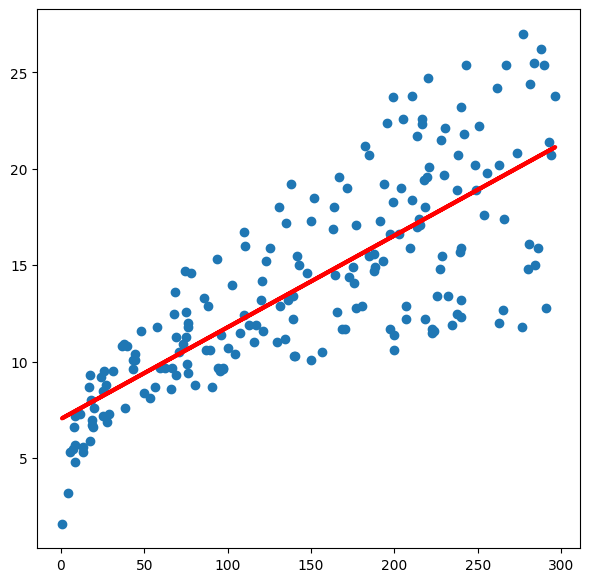

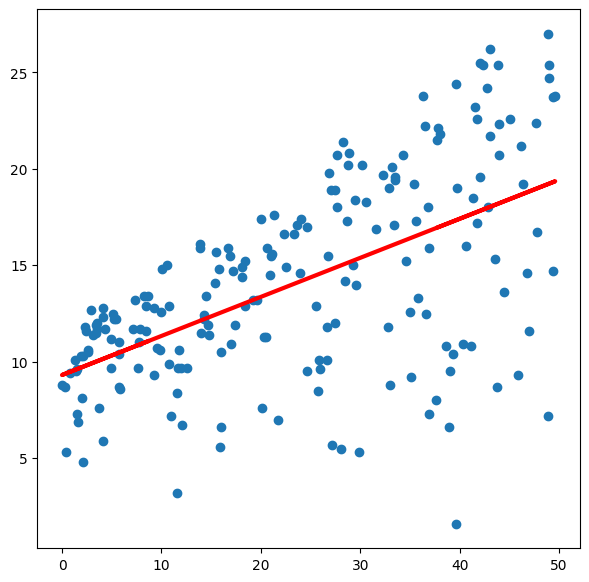

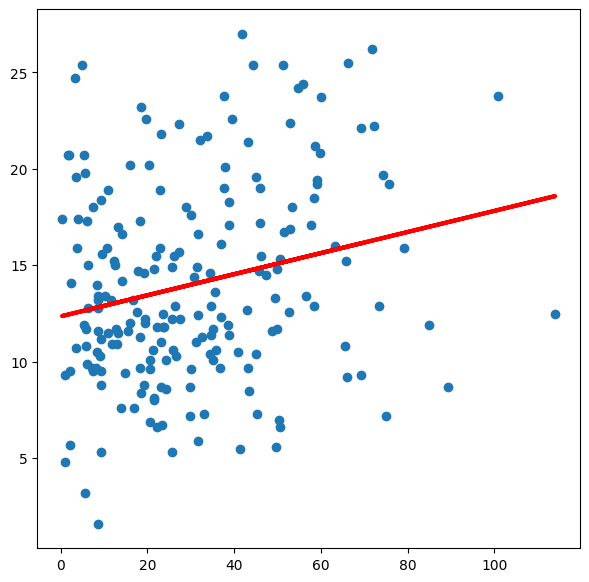

In [118]:
i = 0
for col in adv.columns[:3]:
    plot = adv[col]
    plt.figure(figsize=(7,7))
    plt.scatter(plot.values, adv.Sales)
    plt.plot(data[i], predictions[i], 'red', linewidth = 3)
    i = i+1


## Multiple Linear Regression

In [124]:
combined_model = linear_model.LinearRegression()
combined_model.fit(adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])

LinearRegression()

In [125]:
adv['Predicted'] = combined_model.predict(adv[['TV', 'Radio', 'Newspaper']])

In [127]:
adv['Error'] = (adv['Predicted'] - adv['Sales'])**2

In [129]:
MSE_MLR = adv['Error'].mean()
MSE_MLR

2.784126314510936

In [131]:
combined_model.score(adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])

0.8972106381789522

The multiple linear regression has a better R-squared score than the individual single regressions

In [133]:
import statsmodels.formula.api as smf

In [136]:
adv

,TV,Radio,Newspaper,Sales,Predicted,Error
0,230.1,37.8,69.2,22.1,20.523974,2.483857
1,44.5,39.3,45.1,10.4,12.337855,3.755281
2,17.2,45.9,69.3,9.3,12.307671,9.046084
3,151.5,41.3,58.5,18.5,17.597830,0.813912
4,180.8,10.8,58.4,12.9,13.188672,0.083331
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342,4.971373
196,94.2,4.9,8.1,9.7,8.165312,2.355266
197,177.0,9.3,6.4,12.8,12.785921,0.000198
198,283.6,42.0,66.2,25.5,23.767321,3.002175


In [135]:
lm1 = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = adv).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        15:37:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\19738\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


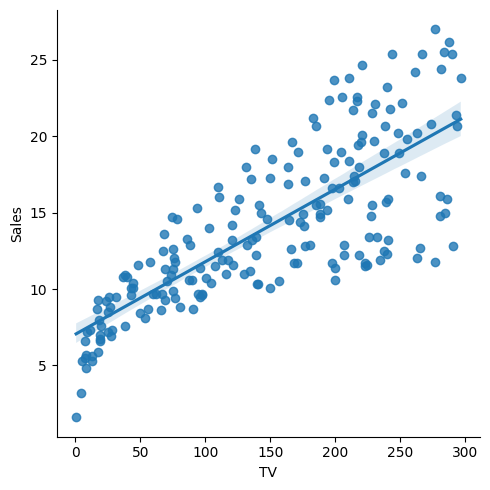

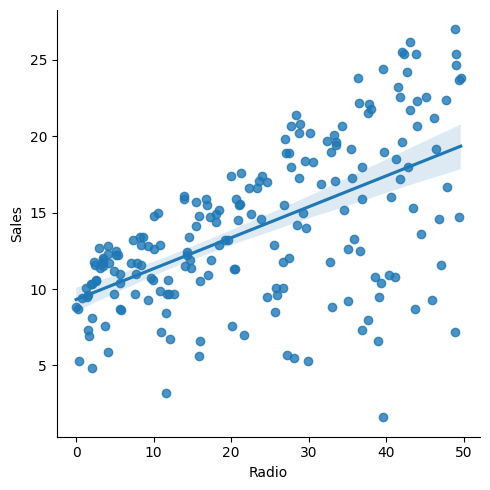

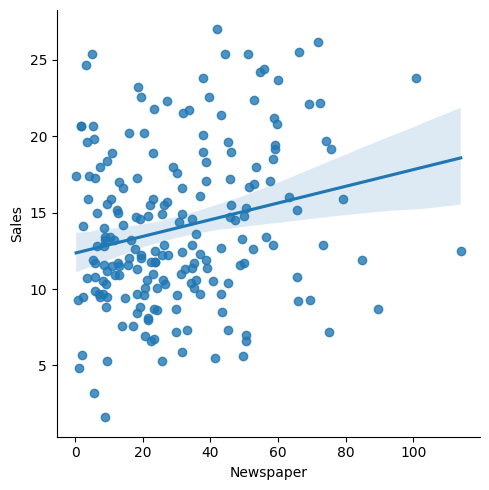

In [141]:
for col in adv.columns[:3]:
    sns.lmplot(x = col, y = 'Sales', data = adv)

In [142]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())

*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

Okay so .86 p-value for newspaper indicates that the null hypothesis that newspaper has no relation to sales may be true.

In [143]:
adv = adv.drop('Newspaper', axis = 1)

In [144]:
adv

,TV,Radio,Sales,Predicted,Error
0,230.1,37.8,22.1,20.523974,2.483857
1,44.5,39.3,10.4,12.337855,3.755281
2,17.2,45.9,9.3,12.307671,9.046084
3,151.5,41.3,18.5,17.597830,0.813912
4,180.8,10.8,12.9,13.188672,0.083331
...,...,...,...,...,...
195,38.2,3.7,7.6,5.370342,4.971373
196,94.2,4.9,9.7,8.165312,2.355266
197,177.0,9.3,12.8,12.785921,0.000198
198,283.6,42.0,25.5,23.767321,3.002175


In [145]:
adv['TVandRadio'] = adv['TV'] * adv['Radio']

In [146]:
new_formula = 'Sales ~ TV + Radio + TVandRadio'
lm2 = smf.ols(formula = new_formula, data = adv).fit()

In [147]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          6.68e-146
Time:                        17:33:40   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [148]:
print("*************Parameters**************")
print(lm2.params)
print("*************P-Values**************")
print(lm2.pvalues)
print("************Standard Errors***************")
print(lm2.bse) 
print("*************Confidence Interval**************")
print(lm2.conf_int())
print("*************Error Covariance Matrix**************")
print(lm2.cov_params())

*************Parameters**************
Intercept     6.750220
TV            0.019101
Radio         0.028860
TVandRadio    0.001086
dtype: float64
*************P-Values**************
Intercept     1.541461e-68
TV            2.363605e-27
Radio         1.400461e-03
TVandRadio    2.757681e-51
dtype: float64
************Standard Errors***************
Intercept     0.247871
TV            0.001504
Radio         0.008905
TVandRadio    0.000052
dtype: float64
*************Confidence Interval**************
                   0         1
Intercept   6.261383  7.239058
TV          0.016135  0.022067
Radio       0.011298  0.046423
TVandRadio  0.000983  0.001190
*************Error Covariance Matrix**************
            Intercept            TV         Radio    TVandRadio
Intercept    0.061440 -3.225975e-04 -1.863612e-03  9.684384e-06
TV          -0.000323  2.262454e-06  9.680456e-06 -6.741106e-08
Radio       -0.001864  9.680456e-06  7.930388e-05 -4.024720e-07
TVandRadio   0.000010 -6.741106e-08 -

## Performance Assessment, Testing and Validation

In [150]:
from sklearn.model_selection import train_test_split


In [152]:
train, test = train_test_split(adv, test_size = .10, train_size = .9)

In [153]:
train, validation = train_test_split(train, test_size = 0.2, train_size = .8)

In [154]:
train.shape, validation.shape, test.shape

((144, 6), (36, 6), (20, 6))